In [86]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [87]:
file_path1 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2019_v02.csv'  # Replace with the path to your CSV file
file_path2 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2020_v02.csv'
file_path3 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2021_v02.csv'
file_path4 = 'E:\Adobe Dont Move\Projects Pending\Develop Oracle of DICVR\dsc_fc_summed_spectra_2022_v02.csv'
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)
# Vertically concatenate the dataframes
df = pd.concat([df1, df2, df3, df4], axis=0)
df

,Time,V1,V2,V3,S1,S2,S3,S4,S5,S6,...,S42,S43,S44,S45,S46,S47,S48,S49,S50,Kp
0,01/01/2019 0:00,1.2478,3.3633,-1.8527,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,01/01/2019 0:10,1.7709,3.4451,-2.1362,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2019 0:20,2.4663,3.6813,-1.9732,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2019 0:30,2.1974,4.0949,-0.7346,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2019 0:40,1.8980,4.5007,-0.1636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,31/12/2022 23:10,-4.9968,1.6259,0.8494,16.1399,0.2317,0.2317,0.4491,3.3471,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52556,31/12/2022 23:20,-4.0324,3.3678,0.8213,22.9514,0.2317,0.2356,0.6609,7.6407,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52557,31/12/2022 23:30,-4.4579,2.8576,0.7823,18.6864,0.2317,0.2554,0.3915,4.7595,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52558,31/12/2022 23:40,-3.5223,2.3134,0.8756,26.5913,0.2317,0.3429,3.8333,9.5035,0.2317,...,282.8825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df['NaN_count'] = df.isna().sum(axis=1)
df['NaN_count'] = df['NaN_count'].astype(float)
df['Kp'] = df['Kp'].interpolate()
df['V1'] = df['V1'].interpolate()
df['V2'] = df['V2'].interpolate()
df['V3'] = df['V3'].interpolate()
df.index = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M')
df

,Time,V1,V2,V3,S1,S2,S3,S4,S5,S6,...,S43,S44,S45,S46,S47,S48,S49,S50,Kp,NaN_count
Time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,01/01/2019 0:00,1.2478,3.3633,-1.8527,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,50.0
2019-01-01 00:10:00,01/01/2019 0:10,1.7709,3.4451,-2.1362,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0185,51.0
2019-01-01 00:20:00,01/01/2019 0:20,2.4663,3.6813,-1.9732,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0370,51.0
2019-01-01 00:30:00,01/01/2019 0:30,2.1974,4.0949,-0.7346,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0555,51.0
2019-01-01 00:40:00,01/01/2019 0:40,1.8980,4.5007,-0.1636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0740,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:10:00,31/12/2022 23:10,-4.9968,1.6259,0.8494,16.1399,0.2317,0.2317,0.4491,3.3471,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0000,12.0
2022-12-31 23:20:00,31/12/2022 23:20,-4.0324,3.3678,0.8213,22.9514,0.2317,0.2356,0.6609,7.6407,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0000,11.0
2022-12-31 23:30:00,31/12/2022 23:30,-4.4579,2.8576,0.7823,18.6864,0.2317,0.2554,0.3915,4.7595,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0000,11.0


In [89]:
lag = 24
df['Kp'] = df['Kp'].shift(-lag)
df = df.drop(df.index[-lag:])
df

,Time,V1,V2,V3,S1,S2,S3,S4,S5,S6,...,S43,S44,S45,S46,S47,S48,S49,S50,Kp,NaN_count
Time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,01/01/2019 0:00,1.2478,3.3633,-1.8527,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.777667,50.0
2019-01-01 00:10:00,01/01/2019 0:10,1.7709,3.4451,-2.1362,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.851778,51.0
2019-01-01 00:20:00,01/01/2019 0:20,2.4663,3.6813,-1.9732,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.925889,51.0
2019-01-01 00:30:00,01/01/2019 0:30,2.1974,4.0949,-0.7346,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,51.0
2019-01-01 00:40:00,01/01/2019 0:40,1.8980,4.5007,-0.1636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.074111,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:10:00,31/12/2022 19:10,-4.9451,2.3078,1.1309,27.2351,0.2317,0.2672,0.9918,16.7502,0.2317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,12.0
2022-12-31 19:20:00,31/12/2022 19:20,-4.3614,2.6638,1.9672,39.5408,0.2317,1.6455,3.6831,21.2129,0.2729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,9.0
2022-12-31 19:30:00,31/12/2022 19:30,-3.9662,2.2777,1.7683,28.2196,0.2317,0.5395,2.3608,14.9480,0.2317,...,381.276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,8.0


In [90]:
kp_column = 'Kp'
sensor_columns = [col for col in df.columns if col != 'Time' and col != kp_column]
#sensor_columns = ['V1', 'V2', 'V2', 'NaN_count']
kp_data = df[kp_column].values.reshape(-1, 1)
sensor_data = df[sensor_columns].values

In [91]:
# Define the date range
start_date = '2019-06-20'
end_date = '2020-07-01'

# Create a boolean mask to select rows outside the date range
mask = (df['Time'] < start_date) | (df['Time'] > end_date)

# Use the mask to filter the DataFrame
filtered_df = df[mask]
df.reset_index(drop=True, inplace=True)

<Axes: >

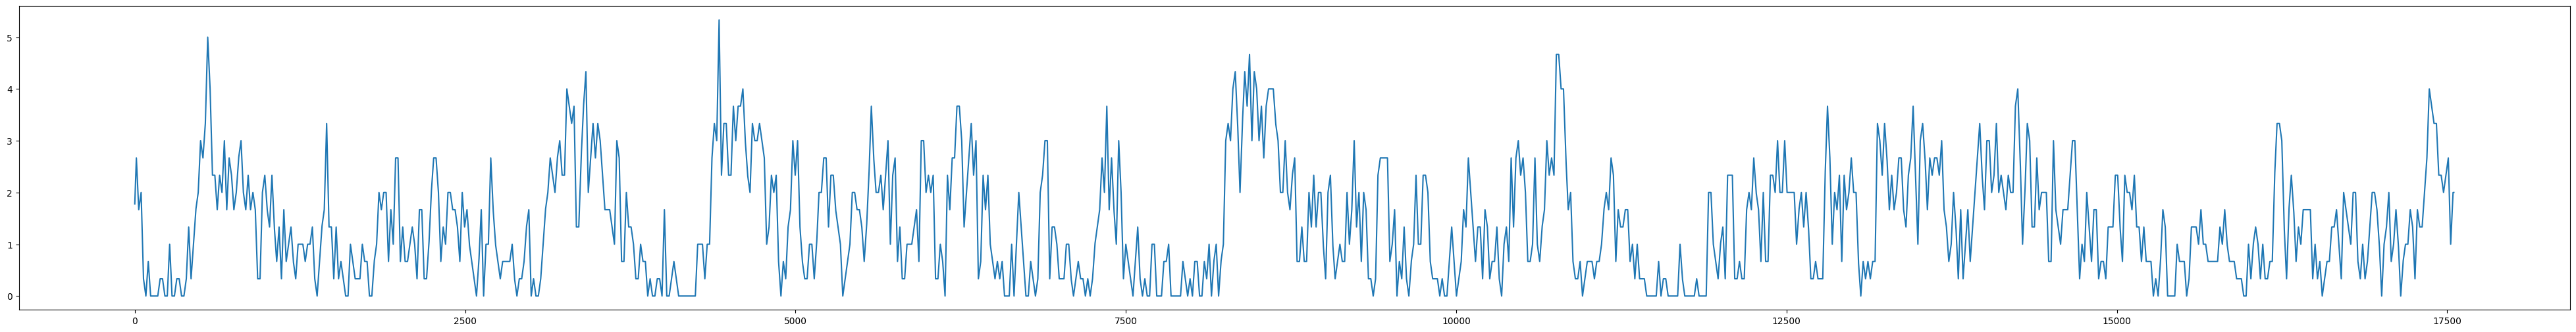

In [92]:
kpd = df['Kp']
#nad = df['NaN_count']
ten_percent_index = int(len(kpd) * 0.1)
#ten_percent_index3 = int(len(nad) * 0.1)
first_10_percent = kpd.iloc[:ten_percent_index]
#first_10_percent3 = nad.iloc[:ten_percent_index3]
plt.figure(figsize=(50, 6))
first_10_percent.plot()
#first_10_percent3.plot()

In [93]:
kp_data[:10000]

array([[1.77766667],
       [1.85177778],
       [1.92588889],
       ...,
       [0.18527778],
       [0.14822222],
       [0.11116667]])

In [94]:
kp_data.shape

(175512, 1)

In [95]:
sensor_data = np.nan_to_num(sensor_data, nan=0)
sensor_data

array([[ 1.2478,  3.3633, -1.8527, ...,  0.    ,  0.    , 50.    ],
       [ 1.7709,  3.4451, -2.1362, ...,  0.    ,  0.    , 51.    ],
       [ 2.4663,  3.6813, -1.9732, ...,  0.    ,  0.    , 51.    ],
       ...,
       [-3.9662,  2.2777,  1.7683, ...,  0.    ,  0.    ,  8.    ],
       [-4.6475,  0.0998,  0.8748, ...,  0.    ,  0.    , 12.    ],
       [-4.2546, -1.2061, -2.2073, ...,  0.    ,  0.    ,  9.    ]])

In [96]:
# Normalize the data to the range [0, 1] separately for Kp and sensor inputs
scaler_kp = MinMaxScaler()
scaler_data = MinMaxScaler()

kp_data_scaled = scaler_kp.fit_transform(kp_data)
sensor_data_scaled = scaler_data.fit_transform(sensor_data)
sensor_data_scaled.shape

(175512, 54)

In [97]:
kp_data_scaled

array([[0.23185948],
       [0.24152573],
       [0.25119198],
       ...,
       [0.52171645],
       [0.52171645],
       [0.52171645]])

In [98]:
kp_data_scaled.shape

(175512, 1)

In [99]:
# Define a function to prepare data for the LSTM
def create_sequences(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :-1])
        Y.append(data[i + look_back, 54])  # Kp values
    return np.array(X), np.array(Y)

In [100]:
# Set the look-back period (number of past time steps to consider)
look_back = 60

In [101]:
# Create sequences for training,
X, Y = create_sequences(np.hstack((sensor_data_scaled, kp_data_scaled)), look_back)

In [102]:
X

array([[[0.52703438, 0.59954212, 0.42639739, ..., 0.        ,
         0.        , 0.92592593],
        [0.54065376, 0.60123536, 0.42015101, ..., 0.        ,
         0.        , 0.94444444],
        [0.55875913, 0.60612465, 0.42374241, ..., 0.        ,
         0.        , 0.94444444],
        ...,
        [0.54312197, 0.60613914, 0.46522629, ..., 0.        ,
         0.        , 0.57407407],
        [0.51878621, 0.57109856, 0.4127457 , ..., 0.        ,
         0.        , 0.55555556],
        [0.46337399, 0.57785289, 0.50747693, ..., 0.        ,
         0.        , 0.57407407]],

       [[0.54065376, 0.60123536, 0.42015101, ..., 0.        ,
         0.        , 0.94444444],
        [0.55875913, 0.60612465, 0.42374241, ..., 0.        ,
         0.        , 0.94444444],
        [0.55175807, 0.61468608, 0.45103258, ..., 0.        ,
         0.        , 0.94444444],
        ...,
        [0.51878621, 0.57109856, 0.4127457 , ..., 0.        ,
         0.        , 0.55555556],
        [0.4

In [103]:
Y

array([0.115908  , 0.10382882, 0.09174963, ..., 0.52171645, 0.52171645,
       0.52171645])

In [104]:
Y.shape

(175452,)

In [105]:
# Splitting data into training and testing sets
train_size = int(len(X) * 0.7)  # 70% for training
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [106]:
X.shape

(175452, 60, 54)

In [107]:
X_train

array([[[0.52703438, 0.59954212, 0.42639739, ..., 0.        ,
         0.        , 0.92592593],
        [0.54065376, 0.60123536, 0.42015101, ..., 0.        ,
         0.        , 0.94444444],
        [0.55875913, 0.60612465, 0.42374241, ..., 0.        ,
         0.        , 0.94444444],
        ...,
        [0.54312197, 0.60613914, 0.46522629, ..., 0.        ,
         0.        , 0.57407407],
        [0.51878621, 0.57109856, 0.4127457 , ..., 0.        ,
         0.        , 0.55555556],
        [0.46337399, 0.57785289, 0.50747693, ..., 0.        ,
         0.        , 0.57407407]],

       [[0.54065376, 0.60123536, 0.42015101, ..., 0.        ,
         0.        , 0.94444444],
        [0.55875913, 0.60612465, 0.42374241, ..., 0.        ,
         0.        , 0.94444444],
        [0.55175807, 0.61468608, 0.45103258, ..., 0.        ,
         0.        , 0.94444444],
        ...,
        [0.51878621, 0.57109856, 0.4127457 , ..., 0.        ,
         0.        , 0.55555556],
        [0.4

In [108]:
# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, 54), return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                30464     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 30529 (119.25 KB)
Trainable params: 30529 (119.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
1919/1919 [==============================] - 99s 49ms/step - loss: 0.0115
Epoch 2/10
1919/1919 [==============================] - 93s 48ms/step - loss: 0.0100
Epoch 3/10
1919/1919 [==============================] - 90s 47ms/step - loss: 0.0092
Epoch 4/10
1919/1919 [==============================] - 85s 44ms/step - loss: 0.0087
Epoch 5/10
1919/1919 [==============================] - 84s 44ms/step - loss: 0.0080
Epoch 6/10
1919/1919 [==============================] - 74s 39ms/step - loss: 0.0074
Epoch 7/10
1919/1919 [==============================] - 72s 37ms/step - loss: 0.0068
Epoch 8/10
1919/1919 [==============================] - 91s 47ms/step - loss: 0.0063
Epoch 9/10
1919/1919 [==============================] - 95s 50ms/step - loss: 0.0057
Epoch 10/10
1919/1919 [==============================] - 93s 48ms/step - loss: 0.0052


In [110]:
# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

MemoryError: Unable to allocate 2.96 GiB for an array with shape (122816, 60, 54) and data type float64

In [ ]:
train_predict

array([[0.21841036],
       [0.22260614],
       [0.240176  ],
       ...,
       [0.11085738],
       [0.13529749],
       [0.1377265 ]], dtype=float32)

In [ ]:
# Inverse transform the scaled predictions to original scale for Kp
train_predict = scaler_kp.inverse_transform(train_predict)
test_predict = scaler_kp.inverse_transform(test_predict)
# Calculate root mean squared error for evaluation
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 1.4291477318939394
Test RMSE: 1.897248668895551


In [ ]:
Y_train

array([0.26085822, 0.24877904, 0.23669985, ..., 0.09415533, 0.10140139,
       0.10864745])

In [ ]:
Y_train = Y_train.reshape(-1, 1)
Y_train = scaler_kp.inverse_transform(Y_train)
Y_train

array([[2.        ],
       [1.90738889],
       [1.81477778],
       ...,
       [0.72188889],
       [0.77744444],
       [0.833     ]])

In [ ]:
train_predict.shape

(122824, 1)

In [ ]:
Y_train.shape

(122824, 1)

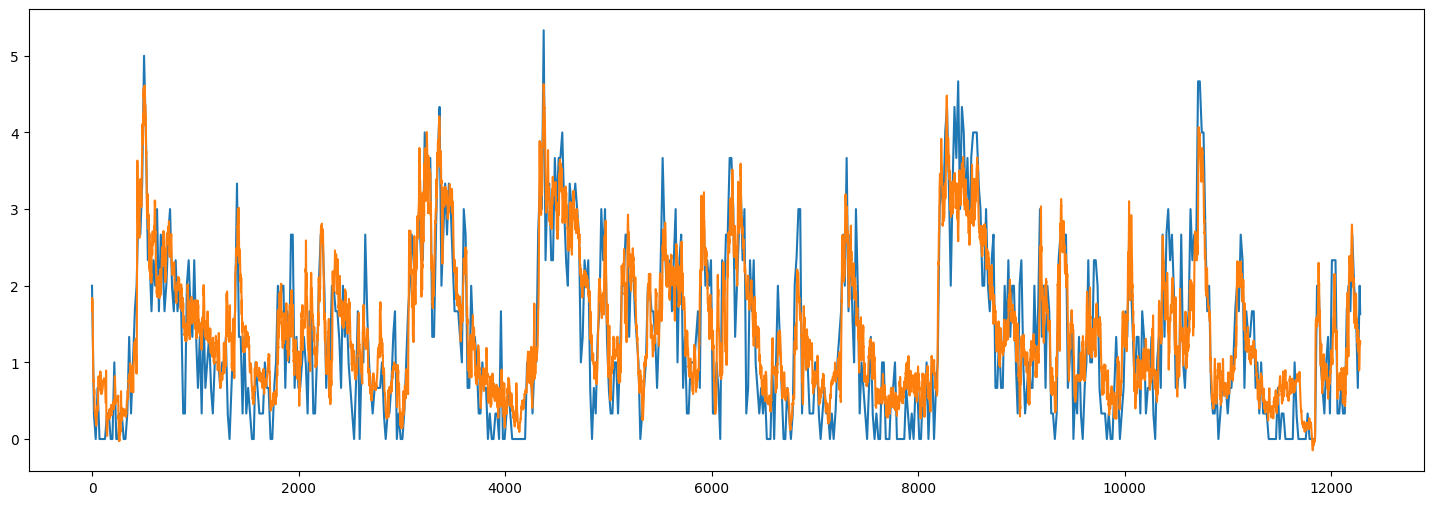

In [ ]:
ten_percent_index = int(len(Y_train) * 0.1)
ten_percent1_index = int(len(train_predict) * 0.1)
plt.figure(figsize=(18, 6))
plt.plot(Y_train[:ten_percent_index], label='Y_train (First 10%)')
plt.plot(train_predict[:ten_percent1_index], label='train_predict (First 10%)')

In [ ]:
Y_test

array([0.11589351, 0.12313957, 0.13038564, ..., 0.52171645, 0.52171645,
       0.52171645])

In [ ]:
Y_test = Y_test.reshape(-1, 1)
Y_test = scaler_kp.inverse_transform(Y_test)
Y_test

array([[0.88855556],
       [0.94411111],
       [0.99966667],
       ...,
       [4.        ],
       [4.        ],
       [4.        ]])

In [ ]:
test_predict

array([[1.0506529],
       [1.1276219],
       [1.0577651],
       ...,
       [3.0704906],
       [3.1162486],
       [3.1134086]], dtype=float32)

In [ ]:
Y_test

array([[0.88855556],
       [0.94411111],
       [0.99966667],
       ...,
       [4.        ],
       [4.        ],
       [4.        ]])

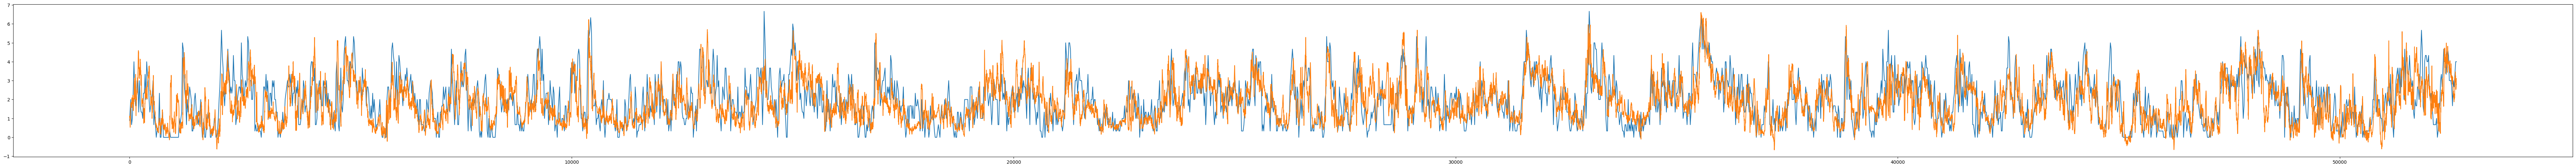

In [ ]:
ten_percent_index = int(len(Y_test) * 1)
ten_percent1_index = int(len(test_predict) * 1)
plt.figure(figsize=(100, 6))
plt.plot(Y_test[:ten_percent_index], label='Y_test (First 10%)')
plt.plot(test_predict[:ten_percent1_index], label='test_predict (First 10%)')

In [ ]:
#to calculate average percentage error
#res = ((test_predict-Y_test)/Y_test)*100
#res = abs(np.round((np.mean(res)),3))
#res
res = np.round(np.mean(abs(test_predict-Y_test)),4)
res

0.7628

In [ ]:

if res<z:
    z=res
    n=lag

n 
    


NameError: name 'z' is not defined

In [ ]:
x=0
if x==1:
    # Save the model architecture to a JSON file
    model_json = model.to_json()
    with open('lstm_model.json', 'w') as json_file:
        json_file.write(model_json)

    # Save the model weights to an HDF5 file
    model.save_weights('lstm_model_weights.h5')

    # Save the MinMaxScaler for Kp data
    import joblib
    joblib.dump(scaler_kp, 'scaler_kp.pkl')
    joblib.dump(scaler_data, 'scaler_sensor.pkl')